# Final Adult Data Set Project

Adult Data Set Summary:

This data set is from the 1994 Census Database. The values measured include Age, Working status, Education, Marital Status, Occupation, Relationship, Race, Sex, Capital-gain, Capital-loss, Weekly working hours, and Native Country. There are 32,561 total data entries.

The age distribution is skewed right with an average of 39 years old. The mean of education is 9, or a highschool education, but the distribution is skewed left. There is an average of 40 hours worked weekly, but the distribution is skewed slightly to right.

The majority of the people in the dataset have a native country of the USA (29,170). The next largest country of origin is Mexico (643). 

27,816 of the dataset are white, 3124 are Black, 1039 are Asian or Pacific Islander, 311 are American Indian or Eskimo, and 271 are unidentified. 

The majority of the people in this data set make under or equal to 50k a year.

The goal of this dataset is to use it to create a test algorithm that predicts whether a given person has an income of over or under 50k.

# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pickle

from sklearn.linear_model import LinearRegression, SGDRegressor

#for random tree analysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
 
# for k nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz

# for logistic regression
from sklearn.linear_model import LogisticRegression

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Step 2: Read the data into a datafram using pandas

The data is stored without column names. We need to name those in a descriptive way.

We will also strip away extra white spaces in the data with the skipinitialspace attribute.

In [2]:
adult_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=',', 
                       header = None, skipinitialspace = True)
adult_df.head(10) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Step 3: Checking Dimensions and Info 

Note 1:  The missing data is taking some format other than NaNs. 
Additionally, all numerical columns seem to not contain missing values. However, ranges must be inspected in case missing values = 0

In [3]:
adult_df.shape

(32561, 15)

In [4]:
adult_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
nrow = len(adult_df.index) # just another way to get the number of rows
print(nrow)

32561


# Step 4: Rename Columns

In [6]:
adult_df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [7]:
adult_df.columns = ['age', 'workclass', 'fnlwgt' , 'education','education_num', 
                    'marital_status','occupation','relationship','race', 'gender' , 
                    'capital_gain', 'capital_loss','hours_week','country', 'earn_50k']

In [8]:
adult_df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_week,country,earn_50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


# Step 5: Data Cleaning

## Step 5.1: Discover format of missing values 

In [9]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


 ### No missing values in numerical columns

In [10]:
obj_col = ['gender', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'country', 'earn_50k']

for col in obj_col:
    print(col)
    print(adult_df[col].value_counts(),'\n')

gender
Male      21790
Female    10771
Name: gender, dtype: int64 

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64 

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64 

marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: i

### There are missing values in the form of '?' in three columns: workclass,  occupation, and country

## Step 5.2: Delete the missing values 

drop a row if it contains a certain value: 

df[df.name != 'certain value']

In [11]:
adult_df = adult_df[adult_df["workclass"] != "?"]
adult_df = adult_df[adult_df["occupation"] != "?"]
adult_df = adult_df[adult_df["country"] != "?"]

In [12]:
adult_df.shape

(30162, 15)

In [13]:
adult_df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

# Step 6: Grouping Categorical Columns

We now create new and simplified categories for the data in the workclass, marital status, and education columns.

In [14]:
adult_df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

In [15]:
adult_df['education'] = adult_df['education'].replace(['Bachelors','Masters','Doctorate'], 'grad')
adult_df['education'] = adult_df['education'].replace(['Some-college','Assoc-voc','Assoc-acdm','Prof-school'], 'assoc')
adult_df['education'] = adult_df['education'].replace(['HS-grad'], 'hs')
adult_df['education'] = adult_df['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'], 'under_hs')
adult_df['education'].value_counts()

hs          9840
assoc       9535
grad        7046
under_hs    3741
Name: education, dtype: int64

In [16]:
adult_df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [17]:
adult_df['workclass'] = adult_df['workclass'].replace(['State-gov','Federal-gov','Local-gov'], 'gov')
adult_df['workclass'] = adult_df['workclass'].replace(['Self-emp-not-inc','Self-emp-inc'], 'self')
adult_df['workclass'] = adult_df['workclass'].replace(['Without-pay','Never-worked'], 'other')
adult_df['workclass'] = adult_df['workclass'].replace(['Private'], 'private')
adult_df['workclass'].value_counts()

private    22286
gov         4289
self        3573
other         14
Name: workclass, dtype: int64

In [18]:
adult_df.replace(['Divorced', 'Married-AF-spouse', 
              'Married-civ-spouse', 'Married-spouse-absent', 
              'Never-married','Separated','Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True)
adult_df['marital_status'].value_counts()

not married    15706
married        14456
Name: marital_status, dtype: int64

# Step 7: Data Exploration

In [19]:
print(obj_col,'\n')
for col in obj_col:
    print(col)
    print((adult_df[col].value_counts()/nrow)*100,'\n') # displaying value counts in percentage in percentage

['gender', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'country', 'earn_50k'] 

gender
Male      62.590215
Female    30.042075
Name: gender, dtype: float64 

workclass
private    68.443844
gov        13.172200
self       10.973250
other       0.042996
Name: workclass, dtype: float64 

education
hs          30.220202
assoc       29.283499
grad        21.639385
under_hs    11.489205
Name: education, dtype: float64 

marital_status
not married    48.235619
married        44.396671
Name: marital_status, dtype: float64 

occupation
Prof-specialty       12.401339
Craft-repair         12.376770
Exec-managerial      12.260066
Adm-clerical         11.427782
Sales                11.007033
Other-service         9.864562
Machine-op-inspct     6.037898
Transport-moving      4.827862
Handlers-cleaners     4.146064
Farming-fishing       3.037376
Tech-support          2.800897
Protective-serv       1.977826
Priv-house-serv       0.439176
Armed-Forces          0.02

### From the above summary, one can make the following observations:

1. The majority of the individuals in the data are white, Male, work in the US (may be or may be not at the same time). 
2. The majority of the observations are for individuals making below the earning mark of 50k.
3. Approximately third of the observations are for individuals holding a Highschool diploma and almost half hold a bachelor or higher academic degree.
4. More than two thirds of the observations are for individuals working in the private sector.
5. The mean of the age of the individuals in the data is 38 years and the majority (75%) is 48 years old or younger.
6. The mean and the median of the number of working hours per week is almost identical, ca. 40 hrs/week. The majority (75%)works 45 hours or less per week.
7. More than a third of the indivduals in the data have the marital status 'Married', with the family role 'Husband'.


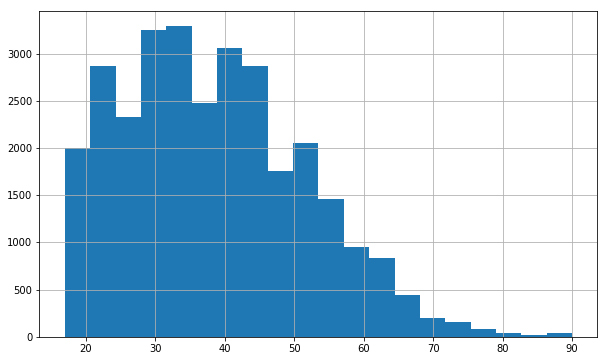

In [20]:
#Age distribution
plt.figure(figsize=(10,6))
adult_df.age.hist(bins=20)

Text(0.5,1,'Age Distribution by Gender')

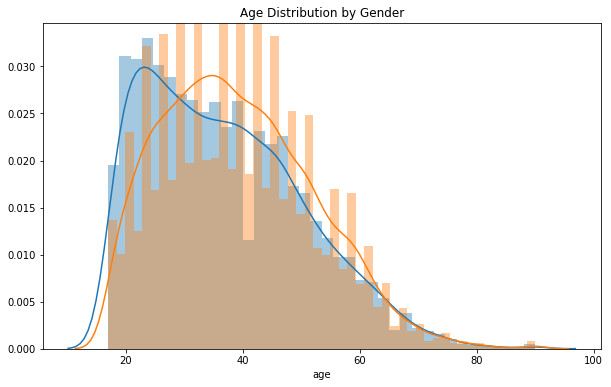

In [21]:
#Age distribution by gender
plt.figure(figsize=(10,6))
sns.distplot(adult_df[adult_df["gender"] == 'Female'].age)
sns.distplot(adult_df[adult_df["gender"] == 'Male'].age)
plt.title('Age Distribution by Gender')


Age is right skewed.   
The the distribution of age for the female subjects is right-tailed whereas that of the male subject is more symmetric for the same range.

### Replace income group with 0,1 to visualize income level by occupation 

In [22]:
adult_df.replace(['>50K', '<=50K'],
                 ['1', '0'], inplace= True)
adult_df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_week,country,earn_50k
0,39,gov,77516,grad,13,not married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,self,83311,grad,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,private,215646,hs,9,not married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,private,234721,under_hs,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,private,338409,grad,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,private,284582,grad,14,married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,private,160187,under_hs,5,married,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,self,209642,hs,9,married,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,private,45781,grad,14,not married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,private,159449,grad,13,married,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


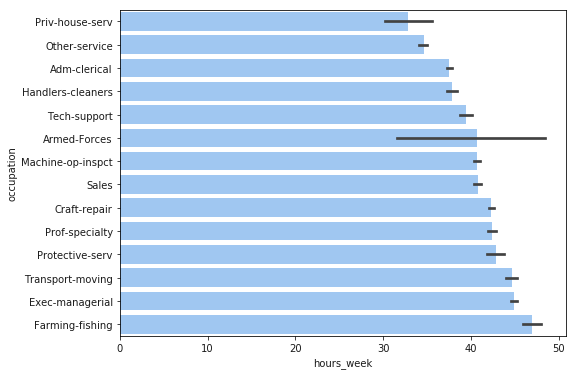

In [23]:
f, ax = plt.subplots(figsize=(8, 6))
result = adult_df.groupby(["occupation"])['hours_week'].aggregate(np.mean).reset_index().sort_values('hours_week')
sns.set_color_codes("pastel")
sns.barplot(x="hours_week", y="occupation", data=adult_df, color="b", order=result['occupation'])

In [24]:
adult_df.groupby(['workclass','earn_50k'])[['earn_50k']].count()

earn_50k
workclass earn_50k          
gov       0             2971
          1             1318
other     0               14
private   0            17410
          1             4876
self      0             2259
          1             1314

### Race groupings 

In [25]:
adult_df.replace(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other'],
                ['White', 'Black', 'Other', 'Other', 'Other'], inplace=True)

In [26]:
adult_df.groupby('race')['race'].count()

race
Black     2817
Other     1412
White    25933
Name: race, dtype: int64

# Step 8: Turn Categorical Columns into Numerical Columns

In [27]:
adult_df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_week,country,earn_50k
0,39,gov,77516,grad,13,not married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,self,83311,grad,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,private,215646,hs,9,not married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,private,234721,under_hs,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,private,338409,grad,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,private,284582,grad,14,married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,private,160187,under_hs,5,married,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,self,209642,hs,9,married,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,private,45781,grad,14,not married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,private,159449,grad,13,married,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [28]:
category_col =['workclass', 'race', 'education','marital_status', 'occupation',
               'relationship', 'gender', 'country'] 

In [29]:
for col in category_col:
    b, c = np.unique(adult_df[col], return_inverse=True) 
    adult_df[col] = c

adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_week,country,earn_50k
0,39,0,77516,1,13,1,0,1,2,1,2174,0,40,38,0
1,50,3,83311,1,13,0,3,0,2,1,0,0,13,38,0
2,38,2,215646,2,9,1,5,1,2,1,0,0,40,38,0
3,53,2,234721,3,7,0,5,0,0,1,0,0,40,38,0
4,28,2,338409,1,13,0,9,5,0,0,0,0,40,4,0


** See Summary for our issues here: Values are organized alphabetically, EXAMPLE 0=associate, 1=grad, 2=highscool, and 3=under_highschool 

### ALTERNATIVE METHOD: Create dictionaries for categorical values for worklass, education, marital status, occupation, relationship, race, gender, and country (?)

def map_categorical(series, val_dict, none_val=0):
    return series.map(lambda x: val_dict[x] if x in val_dict else none_val)

adult_df.workclass.value_counts()

workclass_dict = {'private': 1, 'gov': 2, 'self': 3, 'other': 4}
map_categorical(adult_df.workclass, workclass_dict)

adult_df['workclass'] = map_categorical(adult_df.workclass, workclass_dict)

adult_df.head(5)

# Step 9: Training and Testing

In [30]:
from yellowbrick.features.rankd import Rank1D, Rank2D

In [31]:
train_df = adult_df

Set y train and x train

In [32]:
y_train = train_df.earn_50k
train_df = train_df.drop('earn_50k', axis=1)
X_train = train_df.as_matrix()

### See the correlation between the features with the pearson correlation matrix

Besides the obvious like relationship being correlated to marital status, there are a few other interesting correlations: 

- hours of work is lightly correlated to gender
- hours of work is lightly correlated to education number
- capital gain is lightly correlated to education number 

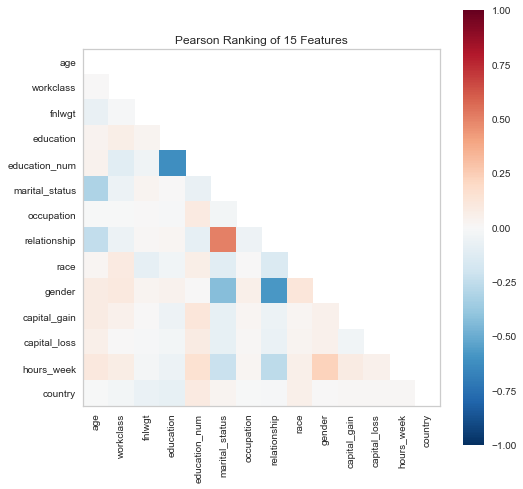

In [33]:
f, ax = plt.subplots(figsize=(8, 8))

visualizer = Rank2D(features=adult_df.columns, algorithm='pearson')

visualizer.fit(X_train, y_train)
visualizer.transform(X_train)
visualizer.poof()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

### Random Forest Training 

In [35]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.844853306813


### Feature Importance

Text(0.5,0,'Relative Importance')

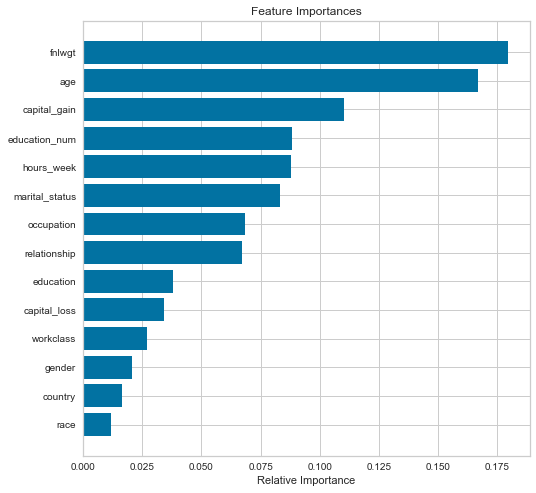

In [36]:
f, ax = plt.subplots(figsize=(8, 8))
features = train_df.columns[:]
importances = randomforest.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### Logistic Regression Training 

In [37]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.785015746726


### K-Nearest Neighbors Training 

In [38]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.758329189458


### Rank1D Plot

/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


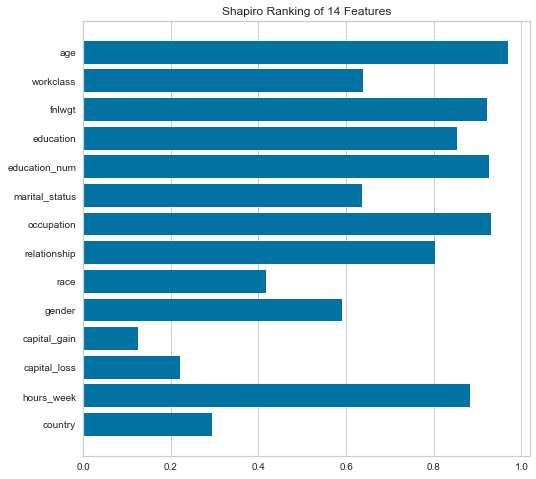

In [39]:
f, ax = plt.subplots(figsize=(8, 8))

visualizer = Rank1D(features=train_df.columns, algorithm='shapiro', )

visualizer.fit(X_train, y_train)                
visualizer.transform(X_train)            
visualizer.poof()

# Summary 

Overall, we found that the Random Forest Training Algorithm yielded the greatest accuracy in predicting the results. AKA the Random Forest Algorithm can predict with an accuracy of 84% whether a given person in the dataset has an income of over or under 50k.

### Some issues we had during this process:

1. We found a way to mass convert categorical data into numerical data by column. However, the way it converts to numbers is alphabetically, which messed up some of our results. (ex. Values are organized alphabetically, EXAMPLE 0=associate, 1=grad, 2=highscool, and 3=under_highschool). Ideally, we would find a better way of quickly converting all our categorical data into numerical form while making sure the order makes more sense for the dataset.

2. We were looking for a way to visualize the logistic regression, but had some issues with errors. 

3. We also had a lot of general confusion about how to apply what we learned from class to this particular dataset. We took a lot of great info from the Kaggle dataset, but if you have any suggestions, they'd be greatly appreciated. 
